In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Using scipy’s quad function, write a program that solves the following integral numerically: I=∫cos(2πx)dx(0...1).     
2. Find the analytical integral and compare it with the numerical solution.       
3. Why is it important to have an estimate of the accuracy (or the error) of the numerical integral?         
4. It is good practice to plot the integrand function to check whether it is “well behaved” before you attempt to integrate. Write a function with name plotquad which takes the same arguments as the quad command (i.e.  f, a and b ) and which (i) creates a plot of the integrand  f(x) and (ii) computes the integral numerically using the quad function. The return values should be as for the quad function.

In [7]:
from math import cos, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return cos(2 * x * pi)

# call quad to integrate f from -2 to 2
res, err = quad(f, 0, 1)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

The numerical result is 0.000000 (+-7.11699e-15)


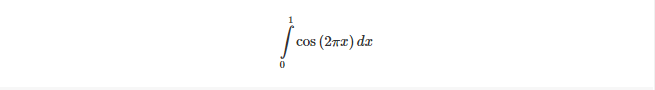
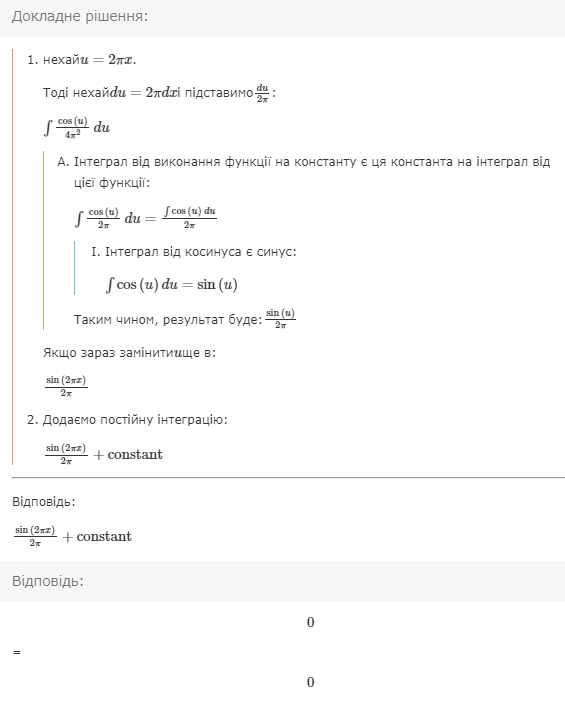

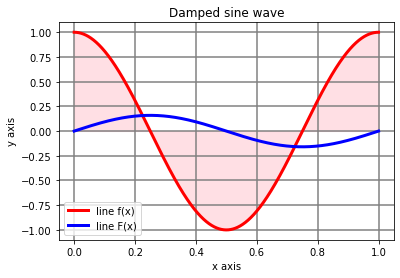

The numerical result is 0.000000 (+-3.28987e-10)


In [14]:
from matplotlib import pyplot as plt
from matplotlib import style

#####################    function for forming an array of graph points    ########################
def fun_integra(x):
    return np.cos(2 * np.pi * x)

#####################            calculation of the integrand             ########################
def fun_res(x):
    return (1/(2*np.pi))*np.sin(2 * np.pi * x)

#####################               definition of majorant                ########################
def mazh_err(x):
    return np.cos(2 * np.pi * x)*(-4*np.pi**2)

#####################                   error calculation                 ########################
def calc_err(x0,x1,st):
    mazh = max(abs(mazh_err(x0)), abs(mazh_err(x1)))
    return (mazh*(x1-x0)*st**2)/12

##################### calculation of the integral by the trapezoid method ########################
a,b,n = 0,1,1e5
x = []
i = []
r = []
k = 1.0*a
st = 1.0*(b-a)/n
while k <= b:
    x = np.append(x, k)
    i = np.append(i, fun_integra(k))
    r = np.append(r, fun_res(k))
    res += (fun_res(k)+fun_res(k-st))
    k += st
err = calc_err(a,b,st)
res*=st*res/2

#####################                 plotting a function                 ########################
plt.fill_between(x, i, 0, color="pink", alpha=0.5)
plt.plot(x, i, 'red', label='line f(x)', linewidth=3)
plt.plot(x, r, 'blue', label='line F(x)', linewidth=3)
plt.grid(color='gray', linestyle='-', linewidth=1.5)
plt.title('Damped sine wave')
plt.legend()
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.show()
print("The numerical result is {:f} (+-{:g})"
    .format(res, err))